**RQ2: How does SLIM_GSGP behave in terms of performance and model size compared to standard GP and traditional GSGP?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 100, #will be 200 for final version
    'n_iter': 500,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_gp = {

    'p_xo': 0.8,
    'max_depth': 17

}

basic_config_gsgp = {

    'p_xo': 0,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct' : True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': 0.5,
    'reconstruct': True,
    'copy_parent': True

}









In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import warnings
warnings.filterwarnings("ignore")
settings_dict = {'': 'name'}
ana = Analysis('sig2gsgp', settings_dict)

Visualization of the Train and Test Error (RMSE) Evolution. 


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>


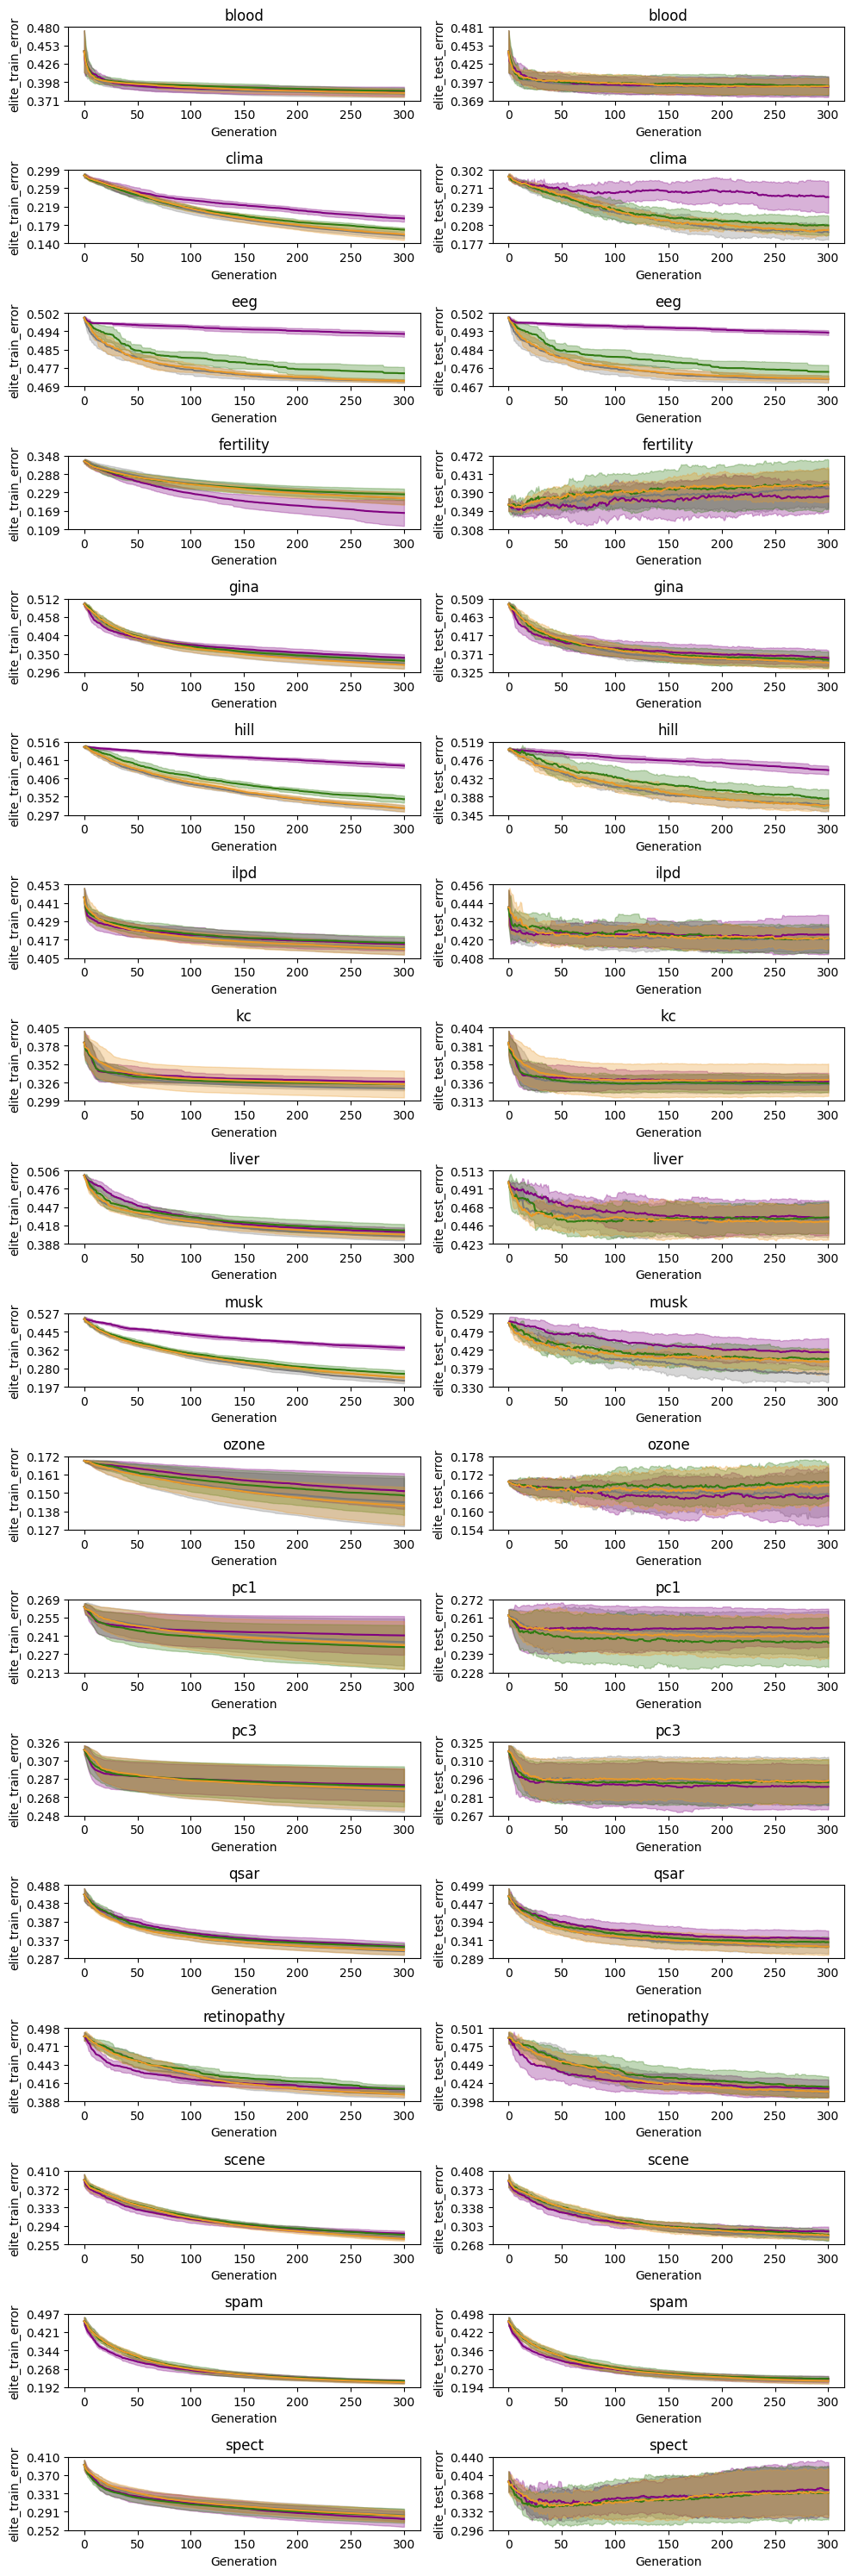

In [2]:
error_evolution_plot(ana.logs)

Median Test Error of the Final Individual

In [3]:
get_aggregated_performance(ana.results, metric='test.f1_score', agg='median')

config_settings,GSGP_,SLIM+ABS_,SLIM+SIG1_,SLIM+SIG2_
dataset_name,,,,
blood,0.415346,0.435087,0.375072,0.387242
clima,0.974793,0.950657,0.969900,0.966777
eeg,0.576869,0.111915,0.567512,0.543938
fertility,0.000000,0.253968,0.111111,0.000000
gina,0.830073,0.836215,0.846746,0.834779
hill,0.817367,0.750584,0.817768,0.814817
ilpd,0.827828,0.821183,0.825531,0.827005
kc,0.327328,0.303452,0.318239,0.324501
liver,0.639076,0.593382,0.608145,0.615406


In [4]:
get_aggregated_performance(ana.results, metric='test.f1_score', agg='median')

config_settings,GSGP_,SLIM+ABS_,SLIM+SIG1_,SLIM+SIG2_
dataset_name,,,,
blood,0.415346,0.435087,0.375072,0.387242
clima,0.974793,0.950657,0.969900,0.966777
eeg,0.576869,0.111915,0.567512,0.543938
fertility,0.000000,0.253968,0.111111,0.000000
gina,0.830073,0.836215,0.846746,0.834779
hill,0.817367,0.750584,0.817768,0.814817
ilpd,0.827828,0.821183,0.825531,0.827005
kc,0.327328,0.303452,0.318239,0.324501
liver,0.639076,0.593382,0.608145,0.615406


P-Values of the Wilcoxon Test comparing the Test Error of the Final Individual

'+': Smaller Test Error at 5% significance level

'-': Larger Test Error at 5% significance level

'&approx;': No significant difference

In [5]:
get_slim_performance_difference_significance_table(ana.results, 'test.rmse')

KeyError: 'SLIM*SIG1_'

Visualization of the Tree Size Evolution


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

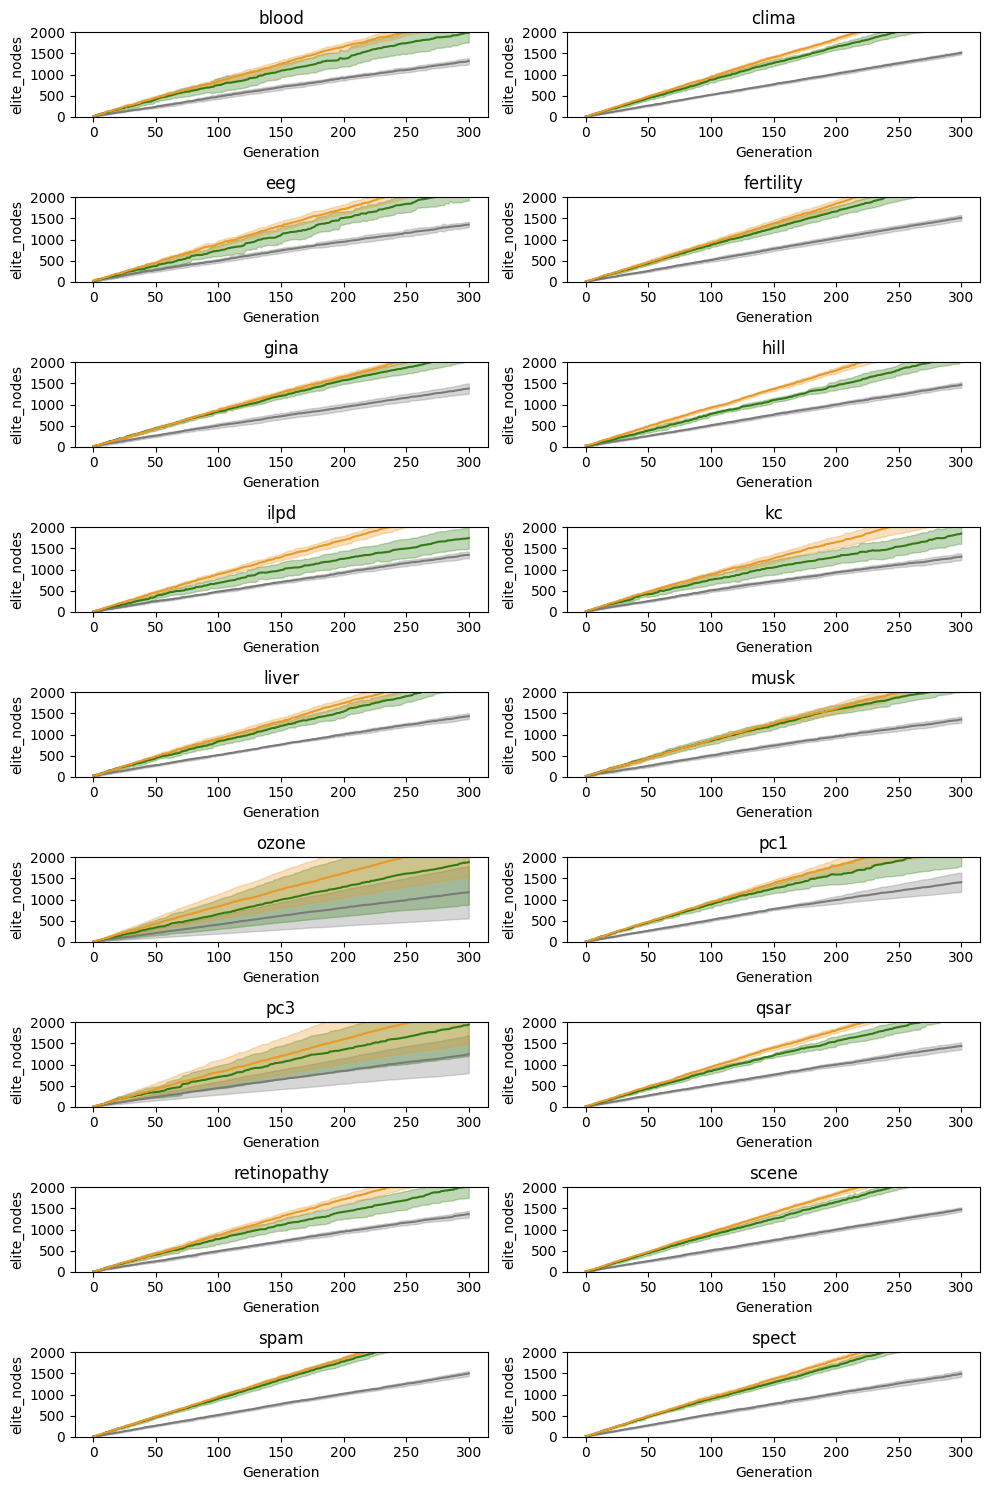

In [9]:
tree_size_evolution_plot(ana.logs[ana.logs['algorithm']!='SLIM+ABS'])

Median Tree Size of the final Individual 

In [ ]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,GSGP_,SLIM+SIG1_,SLIM+SIG2_
dataset_name,,,
blood,923.0,1425.5,1639.0
clima,1020.0,1672.0,1844.5
eeg,910.0,1483.0,1726.5
fertility,1043.0,1647.0,1861.5
gina,949.0,1567.0,1665.5
hill,995.0,1432.5,1776.5
ilpd,926.0,1274.5,1687.0
kc,917.0,1253.0,1616.5
liver,1003.0,1555.5,1745.0


P-Values of the Wilcoxon Test comparing the Tree Size of the Final Individual

'+': Smaller Tree Size at 5% significance level

'-': Larger Tree Size at 5% significance level

'&approx;': No significant difference

In [ ]:
get_slim_performance_difference_significance_table(ana.results, metric = 'nodes_count')

config1_v_config2,SLIM*SIG1__VS_GP_,SLIM*SIG1__VS_GSGP_,SLIM*SIG2__VS_GP_,SLIM*SIG2__VS_GSGP_,SLIM+SIG1__VS_GP_,SLIM+SIG1__VS_GSGP_,SLIM+SIG2__VS_GP_,SLIM+SIG2__VS_GSGP_
dataset_name,,,,,,,,
blood,0.193 (≈),0.002 (+),0.232 (≈),0.002 (+),0.160 (≈),0.002 (+),0.193 (≈),0.002 (+)
clima,0.160 (≈),0.002 (+),0.138 (≈),0.002 (+),0.160 (≈),0.002 (+),0.193 (≈),0.002 (+)
eeg,0.002 (+),0.002 (+),0.002 (+),0.002 (+),0.002 (+),0.002 (+),0.006 (+),0.002 (+)
fertility,0.131 (≈),0.002 (+),0.275 (≈),0.002 (+),0.084 (≈),0.002 (+),0.160 (≈),0.002 (+)
gina,0.432 (≈),0.002 (+),1.000 (≈),0.002 (+),0.432 (≈),0.002 (+),0.432 (≈),0.002 (+)
hill,0.492 (≈),0.002 (+),0.846 (≈),0.002 (+),0.492 (≈),0.002 (+),0.846 (≈),0.002 (+)
ilpd,0.010 (+),0.002 (+),0.014 (+),0.002 (+),0.010 (+),0.002 (+),0.010 (+),0.002 (+)
kc,0.084 (≈),0.002 (+),0.105 (≈),0.002 (+),0.084 (≈),0.002 (+),0.084 (≈),0.002 (+)
liver,0.232 (≈),0.002 (+),0.375 (≈),0.002 (+),0.275 (≈),0.002 (+),0.322 (≈),0.002 (+)


Plot for Comparison of the Average Rank accross Datasets regarding different Evaluation Metrics

<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

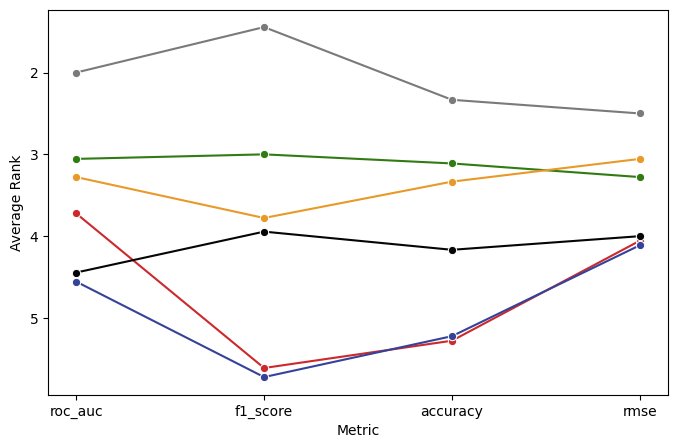

In [ ]:
plot_avg_ranking_multimetrix(ana.results)

Friedman Test results

In [ ]:
get_multimetric_ranking_significance(ana.results)

P-Value of the Friedman Test for ranks regarding Accuracy: 0.00006
P-Value of the Friedman Test for ranks regarding F1-Score: 0.00000
P-Value of the Friedman Test for ranks regarding ROC-AUC: 0.00036
P-Value of the Friedman Test for ranks regarding RMSE: 0.04744
